# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [1]:
import pandas as pd
data = pd.read_csv('mpg.csv')
data
print(data.isnull().sum())


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


### 2.2 Xóa các dòng không có dữ liệu


In [2]:
data = data.dropna()
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [4]:
arr = {'mean', 'median'}
print(round(data.agg({'cylinders': arr, 'horsepower': arr, 'weight': arr}), 4))


        cylinders  horsepower     weight
median     4.0000     93.5000  2803.5000
mean       5.4719    104.4694  2977.5842


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [5]:
print('Miền giá trị của mpg là: ', data['mpg'].max() - data['mpg'].min())
print('Miền phân vị của mpg là: ', data['mpg'].quantile(0.75) - data['mpg'].quantile(0.25))

Miền giá trị của mpg là:  37.6
Miền phân vị của mpg là:  12.0


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [7]:
print(data.groupby('origin').agg({'mpg': 'mean'}))

              mpg
origin           
europe  27.602941
japan   30.450633
usa     20.033469


## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

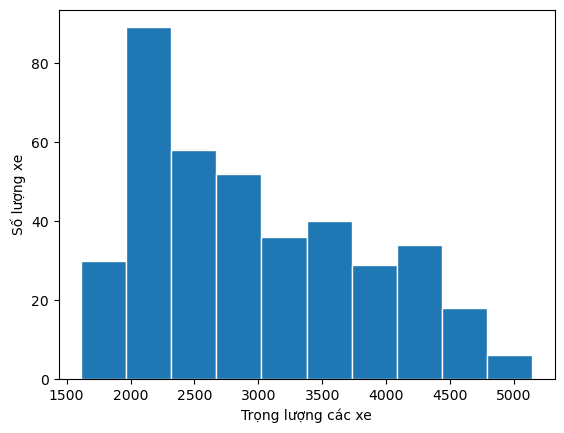

In [11]:
import matplotlib.pyplot as plt
data['weight'].hist(edgecolor='white')
plt.grid(None)
plt.xlabel('Trọng lượng các xe')
plt.ylabel('Số lượng xe')
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [21]:
print(round(data.groupby('origin').size()/len(data),4)*100)

origin
europe    17.35
japan     20.15
usa       62.50
dtype: float64


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

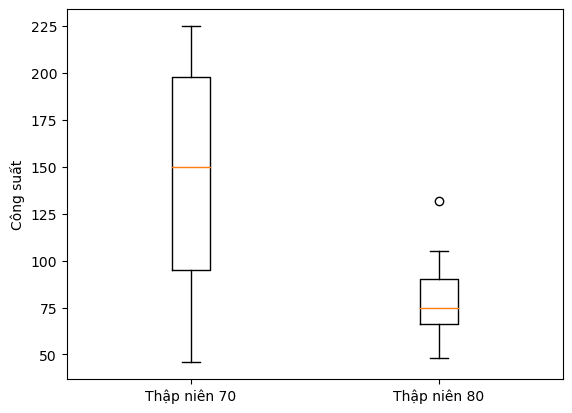

In [38]:
import matplotlib.pyplot as plt
thapNien70 = data['horsepower'][data.model_year / 10 ==7]
thapNien80 = data['horsepower'][data.model_year /10 == 8]
plt.boxplot([thapNien70, thapNien80], labels=['Thập niên 70', 'Thập niên 80'])
plt.ylabel('Công suất')
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

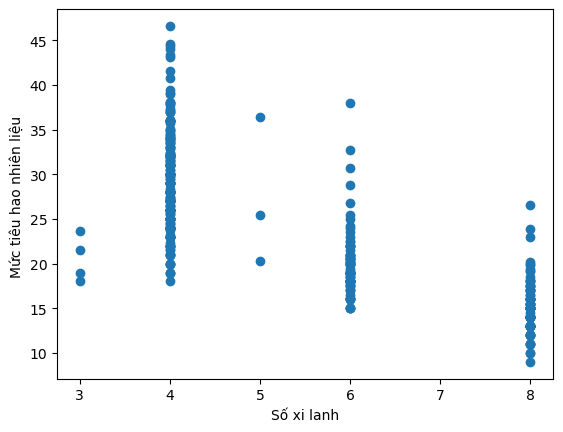

In [48]:
plt.scatter(y=data['mpg'], x=data['cylinders'])
plt.xlabel('Số xi lanh')
plt.ylabel('Mức tiêu hao nhiên liệu ')
plt.show()

### 7.2 Với công suất theo mã lực

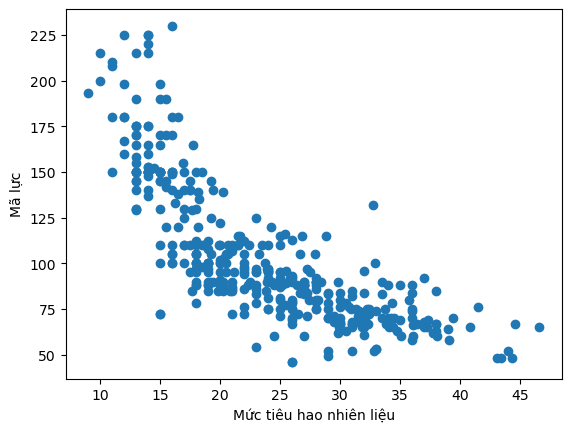

In [47]:
plt.scatter(x=data['mpg'], y=data['horsepower'])
plt.xlabel('Mức tiêu hao nhiên liệu')
plt.ylabel('Mã lực')
plt.show()

### 7.3 Với gia tốc

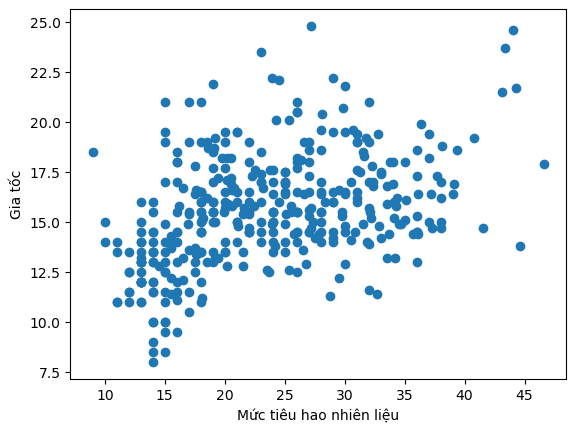

In [42]:
plt.scatter(x=data['mpg'], y=data['acceleration'])
plt.xlabel('Mức tiêu hao nhiên liệu')
plt.ylabel('Gia tốc')
plt.show()

### 7.4 Với năm sản xuất

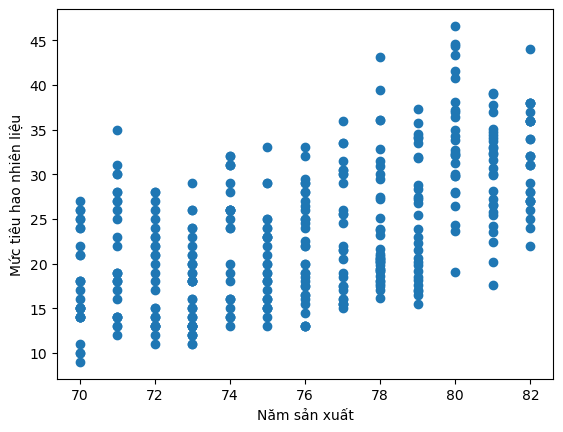

In [45]:
plt.scatter(y=data['mpg'], x=data['model_year'])
plt.xlabel('Năm sản xuất')
plt.ylabel('Mức tiêu hao nhiên liệu')
plt.show()